# Playing with WD data catalogue =>

In [2]:
import pandas as pd

In [4]:
import pandas as pd

path = r"/media/nilay/HDD/IIT KGP 2025/PHD/wd_era5_T42_42p5N.csv"

df = pd.read_csv(path)

print("Shape (rows, cols):", df.shape)
print("\nColumns:\n", df.columns.tolist())

print("\nFirst 10 rows:")
print(df.head(10))

print("\nLast 10 rows:")
print(df.tail(10))


Shape (rows, cols): (420656, 7)

Columns:
 ['timestep', 'track_id', 'time', 'lon', 'lat', 'vort', 'eccentricity']

First 10 rows:
   timestep  track_id              time        lon        lat      vort  \
0         0        12  01/01/1950 00:00  42.226370  34.111677  0.000065   
1         1        12  01/01/1950 03:00  44.353199  30.857220  0.000065   
2         2        12  01/01/1950 06:00  47.105846  30.152118  0.000066   
3         3        12  01/01/1950 09:00  49.229321  30.161235  0.000068   
4         4        12  01/01/1950 12:00  51.368772  29.931326  0.000063   
5         5        12  01/01/1950 15:00  54.185019  30.167712  0.000069   
6         6        12  01/01/1950 18:00  56.239904  30.054967  0.000077   
7         7        12  01/01/1950 21:00  57.694711  30.007345  0.000085   
8         8        99  02/01/1950 00:00  28.773248  29.554303  0.000032   
9         8        12  02/01/1950 00:00  59.791902  29.609728  0.000093   

   eccentricity  
0      0.081610  
1      0

# Seeing inside the updated 2025 WD box=>

In [2]:
import pandas as pd

path = r"/home/nilay/SSD Data Downloads/wd_v5-era5-1950-2025.csv"

df = pd.read_csv(path)

print("Shape (rows, cols):", df.shape)
print("\nColumns:\n", df.columns.tolist())

print("\nFirst 20 rows:")
print(df.head(20))

print("\nLast 20 rows:")
print(df.tail(20))


Shape (rows, cols): (398584, 34)

Columns:
 ['year', 'month', 'day', 'hour', 'lon', 'lat', 'circulation', 'ut_vo_max_200km', 'ut_vo_mean_400km', 'precip_1hr_400km', 'precip_1hr_800km', 'precip_24hr_400km', 'precip_24hr_800km', 'mslp_min_400km', 'ws10_max_400km', 'ws10_mean_400km', 'vo_mean_925_400km', 'vo_mean_850_400km', 'vo_mean_700_400km', 'vo_mean_600_400km', 'vo_mean_500_400km', 'vo_mean_400_400km', 'vo_mean_300_400km', 'precip_box_1hr_karakoram', 'precip_box_24hr_karakoram', 'precip_box_1hr_hindu_kush', 'precip_box_24hr_hindu_kush', 'precip_box_1hr_western_himalaya', 'precip_box_24hr_western_himalaya', 'precip_box_1hr_central_himalaya', 'precip_box_24hr_central_himalaya', 'precip_box_1hr_north_india', 'precip_box_24hr_north_india', 'track_id']

First 20 rows:
    year  month  day  hour        lon        lat  circulation  \
0   1950      1    1     0  42.004360  33.533230    28154.398   
1   1950      1    1     3  43.722622  33.010450    27176.924   
2   1950      1    1     6  4

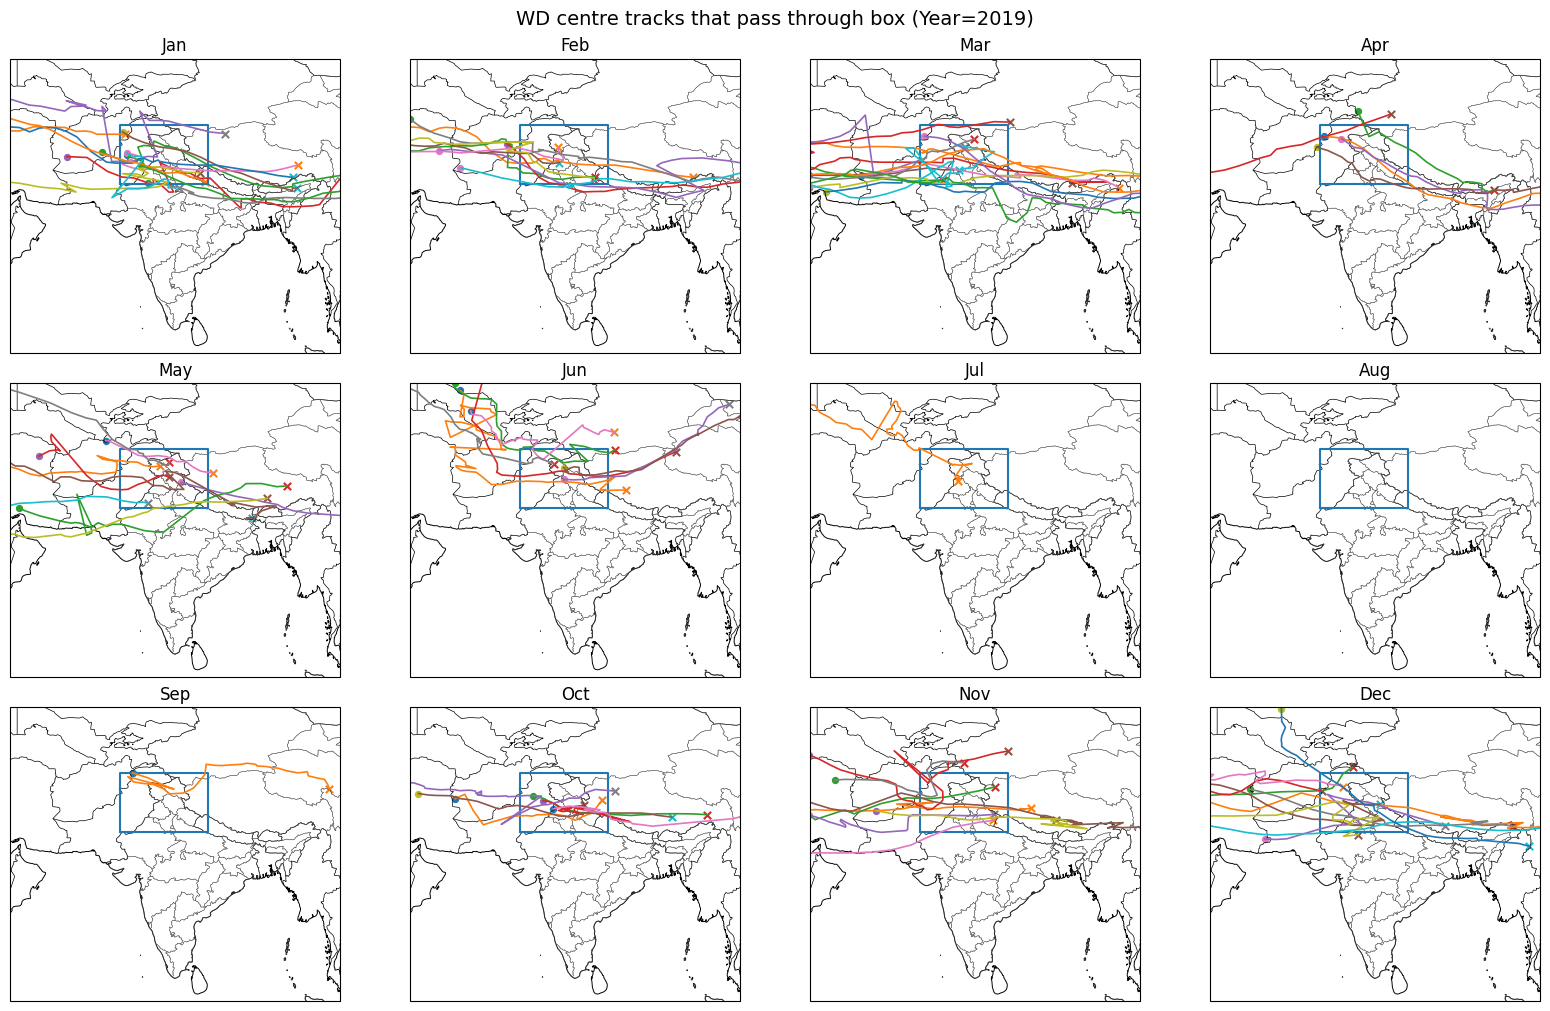

Year 2019: total unique tracks that enter box at least once = 79
Jan: 12 tracks entered the box
Feb: 9 tracks entered the box
Mar: 14 tracks entered the box
Apr: 5 tracks entered the box
May: 9 tracks entered the box
Jun: 7 tracks entered the box
Jul: 1 tracks entered the box
Aug: 0 tracks entered the box
Sep: 1 tracks entered the box
Oct: 6 tracks entered the box
Nov: 8 tracks entered the box
Dec: 10 tracks entered the box


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# ---------------------------
# USER SETTINGS (edit these)
# ---------------------------

YEAR = 2019  # <-- pick the year you want

# Your "box" (lat/lon)
LAT_MIN, LAT_MAX = 28.0, 36.0
LON_MIN, LON_MAX = 70.0, 82.0

# Plot map extent (bigger than box so you can see approach/exit)
MAP_EXTENT = [55, 100, 5, 45]   # [lon_min, lon_max, lat_min, lat_max]

# If you want only "stronger" points (optional). Set to None to disable.
VORT_MIN = None  # e.g., 1e-4

# If your longitude is 0..360 in data, set True. Otherwise False.
LON_0_360 = False

# Limit #tracks drawn per month to avoid clutter (set None for all)
MAX_TRACKS_PER_MONTH = None

# ---------------------------
# INPUT: df (your WD catalogue)
# df must contain: track_id, time, lon, lat, (optional vort)
# ---------------------------
df = pd.read_csv(r"D:\PHD IIT KGP\Codes @ VSCODE\Hunt's WD Dataset\8208019\wd_era5_T42_42p5N.csv")  # example

df = df.copy()

# ---- parse time safely (your print looked like dd/mm/yyyy HH:MM) ----
df["time"] = pd.to_datetime(df["time"], dayfirst=True, errors="coerce")
df = df.dropna(subset=["time", "lon", "lat", "track_id"])

# ---- longitude handling ----
if LON_0_360:
    df["lon"] = (df["lon"] + 180) % 360 - 180  # convert to -180..180

# ---- optional intensity filter ----
if VORT_MIN is not None and "vort" in df.columns:
    df = df[df["vort"] >= VORT_MIN]

# ---- select the year ----
dfy = df[df["time"].dt.year == YEAR].copy()
dfy["month"] = dfy["time"].dt.month

# ---- find tracks that ever enter your box (in that year) ----
in_box = (
    (dfy["lat"].between(LAT_MIN, LAT_MAX)) &
    (dfy["lon"].between(LON_MIN, LON_MAX))
)
tracks_in_box = dfy.loc[in_box, "track_id"].unique()

# Keep only those tracks (but keep their full path within the year)
dfy = dfy[dfy["track_id"].isin(tracks_in_box)].copy()

# Helper: sort each track by time
dfy = dfy.sort_values(["track_id", "time"])

# ---------------------------
# PLOTTING: 12 months (3x4)
# Each panel shows tracks that:
#  - enter the box at ANY time in that month (of the selected year)
# and plots their full path (within the year).
# ---------------------------
proj = ccrs.PlateCarree()
fig, axes = plt.subplots(
    3, 4, figsize=(16, 10),
    subplot_kw={"projection": proj},
    constrained_layout=True
)

month_names = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

for m in range(1, 13):
    ax = axes[(m-1)//4, (m-1)%4]
    ax.set_title(month_names[m-1], fontsize=12)
    ax.set_extent(MAP_EXTENT, crs=proj)

    # Base map
    ax.add_feature(cfeature.COASTLINE, linewidth=0.7)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.STATES.with_scale("50m"), linewidth=0.3, edgecolor="0.3")

    # Draw your box
    box_lons = [LON_MIN, LON_MAX, LON_MAX, LON_MIN, LON_MIN]
    box_lats = [LAT_MIN, LAT_MIN, LAT_MAX, LAT_MAX, LAT_MIN]
    ax.plot(box_lons, box_lats, transform=proj, linewidth=1.5)

    # Tracks that are inside box during THIS month
    in_box_month = (
        (dfy["month"] == m) &
        (dfy["lat"].between(LAT_MIN, LAT_MAX)) &
        (dfy["lon"].between(LON_MIN, LON_MAX))
    )
    month_track_ids = dfy.loc[in_box_month, "track_id"].unique()

    if MAX_TRACKS_PER_MONTH is not None and len(month_track_ids) > MAX_TRACKS_PER_MONTH:
        # keep the longest tracks (by #points) to reduce clutter
        sizes = dfy[dfy["track_id"].isin(month_track_ids)].groupby("track_id").size()
        month_track_ids = sizes.sort_values(ascending=False).head(MAX_TRACKS_PER_MONTH).index.values

    # Plot each track
    for tid in month_track_ids:
        tr = dfy[dfy["track_id"] == tid]

        # line
        ax.plot(tr["lon"].values, tr["lat"].values, transform=proj, linewidth=1.2)

        # start/end markers (within the year)
        ax.scatter(tr["lon"].iloc[0], tr["lat"].iloc[0], transform=proj, s=18, marker="o")
        ax.scatter(tr["lon"].iloc[-1], tr["lat"].iloc[-1], transform=proj, s=28, marker="x")

plt.suptitle(f"WD centre tracks that pass through box (Year={YEAR})", fontsize=14)
plt.show()

print(f"Year {YEAR}: total unique tracks that enter box at least once = {len(tracks_in_box)}")
for m in range(1, 13):
    cnt = dfy.loc[
        (dfy["month"] == m) &
        (dfy["lat"].between(LAT_MIN, LAT_MAX)) &
        (dfy["lon"].between(LON_MIN, LON_MAX)),
        "track_id"
    ].nunique()
    print(f"{month_names[m-1]}: {cnt} tracks entered the box")


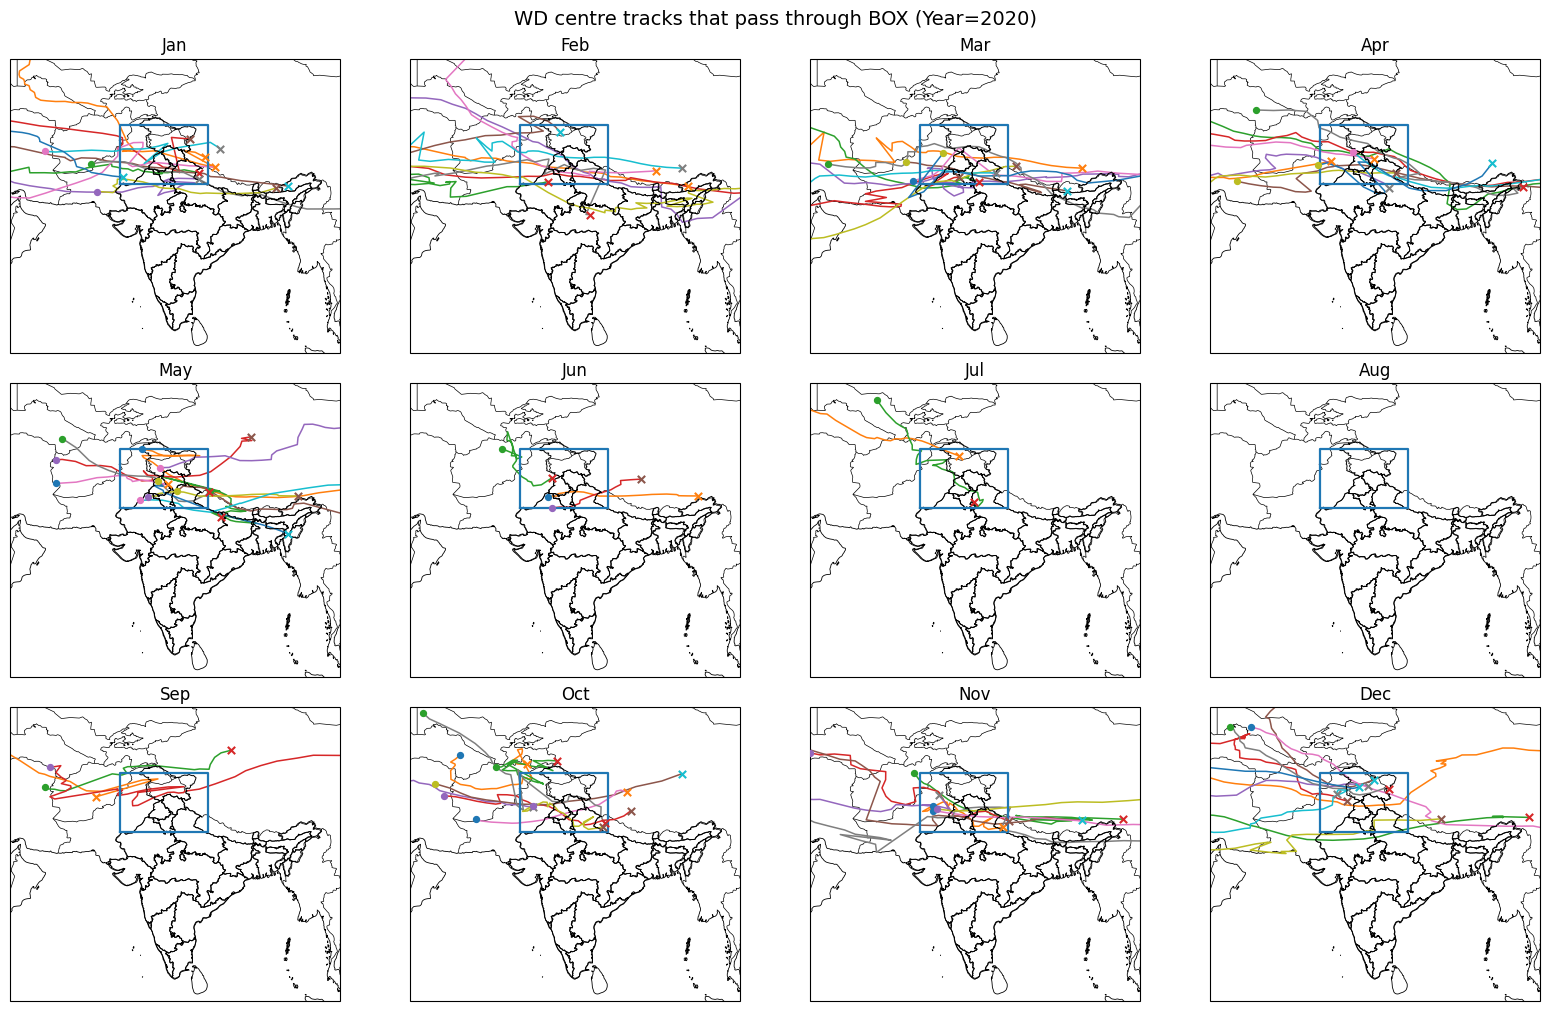

Year 2020: unique tracks that enter box at least once = 85
Jan: 12 tracks entered the box
Feb: 9 tracks entered the box
Mar: 10 tracks entered the box
Apr: 11 tracks entered the box
May: 11 tracks entered the box
Jun: 3 tracks entered the box
Jul: 2 tracks entered the box
Aug: 0 tracks entered the box
Sep: 3 tracks entered the box
Oct: 8 tracks entered the box
Nov: 8 tracks entered the box
Dec: 13 tracks entered the box


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
from cartopy.feature import ShapelyFeature

# =========================================================
# CONTROLS (edit only this block)
# =========================================================

YEAR = 2020

# 1) MAP / TOTAL AREA TO PLOT (extent)
# format: [lon_min, lon_max, lat_min, lat_max]
PLOT_EXTENT = [55, 100, 5, 45]

# 2) YOUR FILTER BOX (which WD must pass through)
BOX_EXTENT = [70, 82, 28, 36]   # [lon_min, lon_max, lat_min, lat_max]

# 3) EXTERNAL SHAPEFILE PATHS (use any shapefile you want)
# Provide .shp path(s). Leave list empty [] if you don't want extra layers.
SHAPEFILES = [
    r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp",
    # r"D:\path\to\your\shapefile\himalaya_boundary.shp",
]

# 4) Longitude convention in your WD data
# True if data lon is 0..360, False if already -180..180
LON_0_360 = False

# 5) Optional filters (set None to disable)
VORT_MIN = None            # e.g., 1e-4
MAX_TRACKS_PER_MONTH = 10  # None = plot all (can get messy)

# 6) Plot options
DRAW_START_END = True      # mark start (o) and end (x)
ONLY_PLOT_SEGMENT_IN_YEAR = True  # keep track points within the selected year

# =========================================================
# INPUT: df (your WD catalogue)
# Required columns: track_id, time, lon, lat
# Optional: vort
# =========================================================
# df = pd.read_csv("wd_catalogue.csv")  # example
df = df.copy()

# ---- parse time (your print looked like dd/mm/yyyy HH:MM) ----
df["time"] = pd.to_datetime(df["time"], dayfirst=True, errors="coerce")
df = df.dropna(subset=["time", "lon", "lat", "track_id"])

# ---- longitude handling ----
if LON_0_360:
    df["lon"] = (df["lon"] + 180) % 360 - 180

# ---- optional intensity filter ----
if VORT_MIN is not None and "vort" in df.columns:
    df = df[df["vort"] >= VORT_MIN]

# ---- select year ----
dfy = df[df["time"].dt.year == YEAR].copy()
dfy["month"] = dfy["time"].dt.month
dfy = dfy.sort_values(["track_id", "time"])

# ---- box filter ----
LON_MIN, LON_MAX, LAT_MIN, LAT_MAX = BOX_EXTENT
in_box = (
    dfy["lon"].between(LON_MIN, LON_MAX) &
    dfy["lat"].between(LAT_MIN, LAT_MAX)
)

tracks_in_box_year = dfy.loc[in_box, "track_id"].unique()
dfy = dfy[dfy["track_id"].isin(tracks_in_box_year)].copy()

# =========================================================
# Helper: add external shapefile(s)
# =========================================================
def add_shapefile(ax, shp_path, linewidth=0.8, edgecolor="black", facecolor="none", zorder=5):
    reader = shpreader.Reader(shp_path)
    feat = ShapelyFeature(reader.geometries(), ccrs.PlateCarree(),
                          edgecolor=edgecolor, facecolor=facecolor, linewidth=linewidth)
    ax.add_feature(feat, zorder=zorder)

# =========================================================
# Plot 12 panels (3x4)
# =========================================================
proj = ccrs.PlateCarree()
fig, axes = plt.subplots(
    3, 4, figsize=(16, 10),
    subplot_kw={"projection": proj},
    constrained_layout=True
)

month_names = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

# Box polygon for drawing
box_lons = [LON_MIN, LON_MAX, LON_MAX, LON_MIN, LON_MIN]
box_lats = [LAT_MIN, LAT_MIN, LAT_MAX, LAT_MAX, LAT_MIN]

for m in range(1, 13):
    ax = axes[(m-1)//4, (m-1)%4]
    ax.set_title(month_names[m-1], fontsize=12)
    ax.set_extent(PLOT_EXTENT, crs=proj)

    # Base layers
    ax.add_feature(cfeature.COASTLINE, linewidth=0.6, zorder=1)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, zorder=1)

    # External shapefile overlays
    for shp in SHAPEFILES:
        add_shapefile(ax, shp, linewidth=0.7, edgecolor="black", facecolor="none", zorder=3)

    # Draw filter box
    ax.plot(box_lons, box_lats, transform=proj, linewidth=1.6, zorder=4)

    # Tracks that ENTER the box during this month
    entered_this_month = (
        (dfy["month"] == m) &
        (dfy["lon"].between(LON_MIN, LON_MAX)) &
        (dfy["lat"].between(LAT_MIN, LAT_MAX))
    )
    month_track_ids = dfy.loc[entered_this_month, "track_id"].unique()

    if MAX_TRACKS_PER_MONTH is not None and len(month_track_ids) > MAX_TRACKS_PER_MONTH:
        sizes = dfy[dfy["track_id"].isin(month_track_ids)].groupby("track_id").size()
        month_track_ids = sizes.sort_values(ascending=False).head(MAX_TRACKS_PER_MONTH).index.values

    for tid in month_track_ids:
        tr = dfy[dfy["track_id"] == tid].sort_values("time")

        # plot full path (within selected year)
        ax.plot(tr["lon"].values, tr["lat"].values, transform=proj, linewidth=1.1, zorder=2)

        if DRAW_START_END and len(tr) >= 2:
            ax.scatter(tr["lon"].iloc[0], tr["lat"].iloc[0], transform=proj, s=18, marker="o", zorder=5)
            ax.scatter(tr["lon"].iloc[-1], tr["lat"].iloc[-1], transform=proj, s=28, marker="x", zorder=5)

plt.suptitle(f"WD centre tracks that pass through BOX (Year={YEAR})", fontsize=14)
plt.show()

# Quick counts
print(f"Year {YEAR}: unique tracks that enter box at least once = {len(tracks_in_box_year)}")
for m in range(1, 13):
    cnt = dfy.loc[
        (dfy["month"] == m) &
        (dfy["lon"].between(LON_MIN, LON_MAX)) &
        (dfy["lat"].between(LAT_MIN, LAT_MAX)),
        "track_id"
    ].nunique()
    print(f"{month_names[m-1]}: {cnt} tracks entered the box")


# Wind download=>

In [5]:
import os
import time
import threading
import calendar
import zipfile
import glob
import cdsapi

# =====================================================
# USER CONTROLS
# =====================================================

out_dir = r"/home/nilay/SSD Data Downloads/ERA5 Wind 2019"

start_year = 2019
end_year   = 2019

months = list(range(1, 13))   # Jan–Dec

# CDS area format = [North, West, South, East]
# Example India window:
# area = [40, 60, 5, 100]
area = None  # Global

# Pressure levels to include INSIDE each monthly file
pressure_levels = ["1000", "925", "850", "700", "500", "200"]

var_short = "UVPL"

# =====================================================
# HELPERS
# =====================================================

def month_name(m):
    return calendar.month_name[m][:12]

def monitor_download(file_path, interval=5):
    print("📥 Download started...")
    last_size = -1
    stable_count = 0

    while True:
        if os.path.exists(file_path):
            size = os.path.getsize(file_path) / (1024**2)
            print(f"   Downloaded: {size:.2f} MB", end="\r")

            if size == last_size:
                stable_count += 1
            else:
                stable_count = 0

            last_size = size

            if stable_count >= 3:
                break

        time.sleep(interval)

    print(f"\n✅ Download finished: {size:.2f} MB")

# =====================================================
# MAIN: 12 files only (one per month)
# Each file contains u,v across ALL selected years + pressure levels
# =====================================================

os.makedirs(out_dir, exist_ok=True)
c = cdsapi.Client()

dataset = "reanalysis-era5-pressure-levels-monthly-means"
years = [str(y) for y in range(start_year, end_year + 1)]

for m in months:
    mon_name = month_name(m)
    out_file = f"{var_short}_u_v_{mon_name}_{start_year}{end_year}.nc"
    out_path = os.path.join(out_dir, out_file)

    # Skip if already downloaded
    if os.path.exists(out_path) and os.path.getsize(out_path) > 0:
        print(f"⏭️  Exists, skipping: {out_file}")
        continue

    print(f"\n🚀 Downloading: {out_file}")

    request = {
        "product_type": "monthly_averaged_reanalysis",
        "variable": [
            "u_component_of_wind",
            "v_component_of_wind"
        ],
        "pressure_level": pressure_levels,  # <-- multiple levels in same file
        "year": years,                      # <-- all years in same file
        "month": f"{m:02d}",
        "time": "00:00",
        "data_format": "netcdf"
    }

    if area is not None:
        request["area"] = area

    monitor_thread = threading.Thread(target=monitor_download, args=(out_path,))
    monitor_thread.start()

    c.retrieve(dataset, request, out_path)

    monitor_thread.join()

    # ZIP handling (same pattern as your script)
    if zipfile.is_zipfile(out_path):
        print("⚠ ZIP detected — extracting and renaming")
        with zipfile.ZipFile(out_path, "r") as z:
            z.extractall(out_dir)
        os.remove(out_path)

        extracted_files = glob.glob(os.path.join(out_dir, "data_stream-*.nc"))
        for f in extracted_files:
            step_type = os.path.basename(f).replace(".nc", "")
            new_name = f"{os.path.splitext(out_file)[0]}_{step_type}.nc"
            os.rename(f, os.path.join(out_dir, new_name))
            print(f"✅ Saved → {new_name}")
    else:
        print("✅ NetCDF delivered directly (no ZIP)")

    print("--------------------------------------------------")



🚀 Downloading: UVPL_u_v_January_20192019.nc
📥 Download started...


2026-01-19 19:08:39,081 INFO Request ID is 52046e30-13c6-4949-b170-395aba3e5736
2026-01-19 19:08:39,303 INFO status has been updated to accepted
2026-01-19 19:10:34,894 INFO status has been updated to successful


dd47726005a59e027219f96f364414c9.nc:   0%|          | 0.00/20.3M [00:00<?, ?B/s]

   Downloaded: 20.31 MB
✅ Download finished: 20.31 MB
✅ NetCDF delivered directly (no ZIP)
--------------------------------------------------

🚀 Downloading: UVPL_u_v_February_20192019.nc
📥 Download started...


2026-01-19 19:11:09,148 INFO Request ID is 7cda32ad-7855-4f0a-9e1a-a64514ade8e6
2026-01-19 19:11:09,368 INFO status has been updated to accepted
2026-01-19 19:11:23,696 INFO status has been updated to running
2026-01-19 19:11:43,236 INFO status has been updated to successful


e32c38125916b9b4608f57f482ec83b4.nc:   0%|          | 0.00/20.3M [00:00<?, ?B/s]

   Downloaded: 20.27 MB
✅ Download finished: 20.27 MB
✅ NetCDF delivered directly (no ZIP)
--------------------------------------------------

🚀 Downloading: UVPL_u_v_March_20192019.nc
📥 Download started...


2026-01-19 19:12:14,103 INFO Request ID is 17d73d76-6d7a-4f5a-95cd-c1de30c6cbb8
2026-01-19 19:12:14,326 INFO status has been updated to accepted
2026-01-19 19:12:28,629 INFO status has been updated to running
2026-01-19 19:12:36,451 INFO status has been updated to successful


698d7964cf29b45358e19d872f548988.nc:   0%|          | 0.00/20.2M [00:00<?, ?B/s]

   Downloaded: 20.20 MB
✅ Download finished: 20.20 MB
✅ NetCDF delivered directly (no ZIP)
--------------------------------------------------

🚀 Downloading: UVPL_u_v_April_20192019.nc
📥 Download started...


2026-01-19 19:13:14,437 INFO Request ID is a08e2d9c-03c4-44eb-95c1-2ba7d570af18
2026-01-19 19:13:14,656 INFO status has been updated to accepted
2026-01-19 19:13:36,749 INFO status has been updated to successful


45d3541671d3f8b236e8d812558911f8.nc:   0%|          | 0.00/20.1M [00:00<?, ?B/s]

   Downloaded: 20.09 MB
✅ Download finished: 20.09 MB
✅ NetCDF delivered directly (no ZIP)
--------------------------------------------------

🚀 Downloading: UVPL_u_v_May_20192019.nc
📥 Download started...


2026-01-19 19:14:14,140 INFO Request ID is b66cbf71-c877-4fd8-bddc-15b1b9fa3ffb
2026-01-19 19:14:14,349 INFO status has been updated to accepted
2026-01-19 19:14:28,656 INFO status has been updated to running
2026-01-19 19:14:48,110 INFO status has been updated to successful


afbc545fb05eb3075dfa7e61882679d3.nc:   0%|          | 0.00/19.9M [00:00<?, ?B/s]

   Downloaded: 19.86 MB
✅ Download finished: 19.86 MB
✅ NetCDF delivered directly (no ZIP)
--------------------------------------------------

🚀 Downloading: UVPL_u_v_June_20192019.nc
📥 Download started...


2026-01-19 19:15:19,149 INFO Request ID is 0f8e58de-d1a7-4ebb-814a-e5211fe26337
2026-01-19 19:15:19,368 INFO status has been updated to accepted
2026-01-19 19:15:41,740 INFO status has been updated to running
2026-01-19 19:15:53,342 INFO status has been updated to successful


2164d193ae9fe6406663aaaf169bcf01.nc:   0%|          | 0.00/19.9M [00:00<?, ?B/s]

   Downloaded: 19.85 MB
✅ Download finished: 19.85 MB
✅ NetCDF delivered directly (no ZIP)
--------------------------------------------------

🚀 Downloading: UVPL_u_v_July_20192019.nc
📥 Download started...


2026-01-19 19:16:34,155 INFO Request ID is 378843d8-917e-45f2-a7f2-9cd4b52b98d9
2026-01-19 19:16:34,390 INFO status has been updated to accepted
2026-01-19 19:16:56,670 INFO status has been updated to running
2026-01-19 19:17:08,415 INFO status has been updated to successful


43e88f04f250d57e98e487b80fe1985c.nc:   0%|          | 0.00/20.0M [00:00<?, ?B/s]

   Downloaded: 19.99 MB
✅ Download finished: 19.99 MB
✅ NetCDF delivered directly (no ZIP)
--------------------------------------------------

🚀 Downloading: UVPL_u_v_August_20192019.nc
📥 Download started...


2026-01-19 19:17:39,170 INFO Request ID is 68874410-94b4-41c0-a922-1eeca6ff9fa5
2026-01-19 19:17:39,389 INFO status has been updated to accepted
2026-01-19 19:19:34,992 INFO status has been updated to successful


60f78411860ce69b3c2535e88a1b2bb.nc:   0%|          | 0.00/19.9M [00:00<?, ?B/s]

   Downloaded: 19.86 MB
✅ Download finished: 19.86 MB
✅ NetCDF delivered directly (no ZIP)
--------------------------------------------------

🚀 Downloading: UVPL_u_v_September_20192019.nc
📥 Download started...


2026-01-19 19:20:14,434 INFO Request ID is 3fd82af8-993b-4b77-834a-6f4c0511c8c5
2026-01-19 19:20:14,657 INFO status has been updated to accepted
2026-01-19 19:20:37,182 INFO status has been updated to successful


65cf27404c7cfbd3d891d277cefbbcbd.nc:   0%|          | 0.00/19.9M [00:00<?, ?B/s]

   Downloaded: 19.85 MB
✅ Download finished: 19.85 MB
✅ NetCDF delivered directly (no ZIP)
--------------------------------------------------

🚀 Downloading: UVPL_u_v_October_20192019.nc
📥 Download started...


2026-01-19 19:21:09,136 INFO Request ID is d439c46f-c342-4cbb-a3b2-150a6cd0af4e
2026-01-19 19:21:09,343 INFO status has been updated to accepted
2026-01-19 19:21:31,395 INFO status has been updated to running
2026-01-19 19:21:43,015 INFO status has been updated to successful


22517ef21c6a45cd97e48c32a88df118.nc:   0%|          | 0.00/20.1M [00:00<?, ?B/s]

   Downloaded: 20.09 MB
✅ Download finished: 20.09 MB
✅ NetCDF delivered directly (no ZIP)
--------------------------------------------------

🚀 Downloading: UVPL_u_v_November_20192019.nc
📥 Download started...


2026-01-19 19:22:19,187 INFO Request ID is b3e82e9a-fe5e-47dd-8a9b-b809d7e3d7da
2026-01-19 19:22:19,390 INFO status has been updated to accepted
2026-01-19 19:22:28,451 INFO status has been updated to running
2026-01-19 19:22:41,676 INFO status has been updated to successful


e24f8455729048ea90edf26d8973c8d1.nc:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

   Downloaded: 20.54 MB
✅ Download finished: 20.54 MB
✅ NetCDF delivered directly (no ZIP)
--------------------------------------------------

🚀 Downloading: UVPL_u_v_December_20192019.nc
📥 Download started...


2026-01-19 19:23:24,176 INFO Request ID is 874e4654-7804-4627-aaa4-510fddf923b1
2026-01-19 19:23:24,416 INFO status has been updated to accepted
2026-01-19 19:23:38,785 INFO status has been updated to successful


ed637c0af9408228a39e3f54b52ba898.nc:   0%|          | 0.00/20.8M [00:00<?, ?B/s]

   Downloaded: 20.83 MB
✅ Download finished: 20.83 MB
✅ NetCDF delivered directly (no ZIP)
--------------------------------------------------
